# Titanic 데이터 전처리 실습

In [1]:
# https://www.kaggle.com/competitions/titanic -> data -> download all -> 그 중 train.csv 만 씀

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action="ignore")

## 1. 데이터 가져오기

In [6]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 원본데이터 복사
df_raw = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 지수통계 확인
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 필요없는 컬럼을 삭제하고 전처리 할 수도 있고
# 전처리 다 한 후 필요없는 컬럼 삭제

## 2. 결측치 확인 및 처리

### 1) 결측치 확인

In [10]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [11]:
# Cabin 컬럼 값에 뭐가 있는지 확인
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
# Embarked 컬럼 값에 뭐가 있는지 확인
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### 2) 결측치 처리

In [13]:
# Age는 평균값으로, Cabin, Embarked 는 object 이므로 'N'으로 처리
# SimpleImputer 써도되고, fillna 써도되고
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Cabin"] = df["Cabin"].fillna("N")
df["Embarked"] = df["Embarked"].fillna("N")

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# 컬럼에서 PassengerId, Name, Ticket
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)    # axis=1(열 기준으로 제거), inplace=True(원본으로 덮어 씌워라)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S


## 3. 범주형 변수 처리 -> 라벨인코딩

In [17]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 범주형데이터(Sex, Cabin, Embarked) 를 숫자로 바꾸기
# le_sex = LabelEncoder()
# le_cabin = LabelEncoder()
# le_embarked = LabelEncoder()

# df["Sex"] = le_sex.fit_transform(df["Sex"])
# df["Cabin"] = le_cabin.fit_transform(df["Cabin"])
# df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

# df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,146,3
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,146,3
3,1,1,0,35.000000,1,0,53.1000,55,3
4,0,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,146,3
887,1,1,0,19.000000,0,0,30.0000,30,3
888,0,3,0,29.699118,1,2,23.4500,146,3
889,1,1,1,26.000000,0,0,30.0000,60,0


In [ ]:
# 범주형데이터(Sex, Cabin, Embarked) 를 숫자로 바꾸기
features = ["Sex", "Cabin", "Embarked"]
for feature in features :
    le = LabelEncoder()
    le_result = le.fit(df[feature])
    df[feature] = le_result.transform(df[feature])      # fit_transform 으로 한번에 가능
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,3
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,3
3,1,1,0,35.0,1,0,53.1000,55,3
4,0,3,1,35.0,0,0,8.0500,146,3


## 4. 이상치 제거

In [ ]:
# 이상치 제거 -> 해보기


## 5. 시각화

<Axes: xlabel='Sex', ylabel='Survived'>

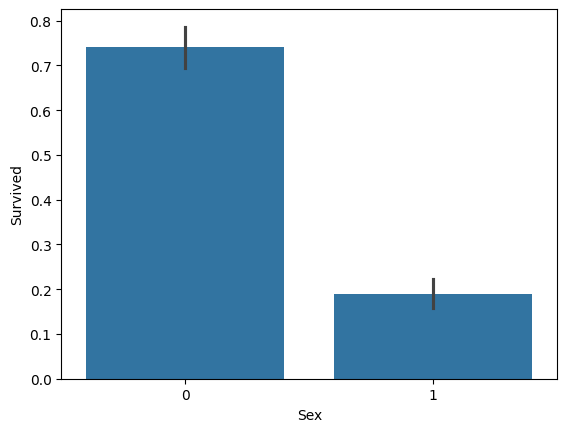

In [19]:
sns.barplot(x="Sex", y="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

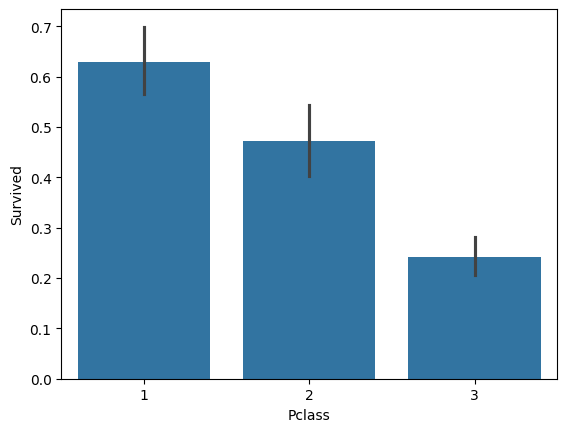

In [20]:
sns.barplot(x="Pclass", y="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

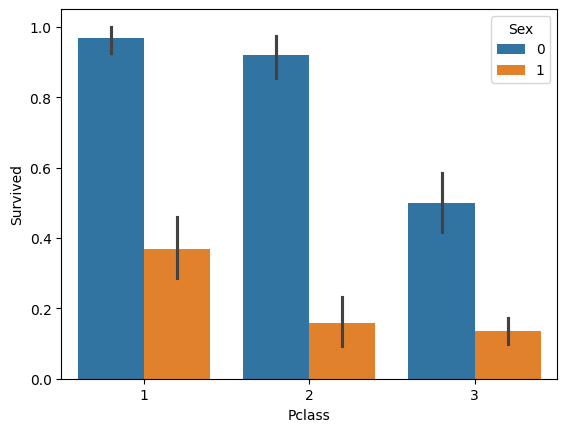

In [21]:
sns.barplot(x="Pclass", y="Survived", hue = "Sex", data=df)

## 6. 데이터 분할

In [23]:
from sklearn.model_selection import train_test_split

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,3
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,3
3,1,1,0,35.0,1,0,53.1000,55,3
4,0,3,1,35.0,0,0,8.0500,146,3


In [24]:
X_data = df.drop("Survived", axis=1)
y_data = df["Survived"]

In [25]:
X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,146,3
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,146,3
3,1,0,35.000000,1,0,53.1000,55,3
4,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,146,3
887,1,0,19.000000,0,0,30.0000,30,3
888,3,0,29.699118,1,2,23.4500,146,3
889,1,1,26.000000,0,0,30.0000,60,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=42)
# 지금 여기선 스케일 작업을 안했음

In [ ]:
# 모델이 직접 스케일작업을 해줌 (그치만 안해주는 모델도 있음..)

## 7. 머신러닝 학습

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# 모델 3개를 만들어 학습을 시켜보자
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

dt_model.fit(X_train, y_train)
dt_result = dt_model.predict(X_test)
accuracy_score(dt_result, y_test)   # 예측값과(dt_result) 실제 정답(y_test)을 넣어서 정확도 측정

0.7374301675977654

In [35]:
rf_model.fit(X_train, y_train)
rf_result = rf_model.predict(X_test)
accuracy_score(rf_result, y_test)

0.7988826815642458

In [36]:
lr_model.fit(X_train, y_train)
lr_result = lr_model.predict(X_test)
accuracy_score(lr_result, y_test)

0.8100558659217877

In [ ]:
# dt_model, rf_model, lr_model 중 lr_model 이 가장 정확도가 높음(81%)

# Penguin 데이터 전처리 실습

In [ ]:
# https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/input -> size.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 1. 데이터 가져오기
df_pg = pd.read_csv("data/penguins_size.csv")
df_pg.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df_pg_raw = df_pg.copy()

In [5]:
df_pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df_pg.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# 2. 결측치 확인
df_pg.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
# 결측치 처리
# culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g 는 평균값으로,
# sex 는 dropna
df_pg = df_pg.dropna(subset=["sex"])

In [9]:
df_pg["culmen_length_mm"] = df_pg["culmen_length_mm"].fillna(df_pg["culmen_length_mm"].mean())
df_pg["culmen_depth_mm"] = df_pg["culmen_depth_mm"].fillna(df_pg["culmen_depth_mm"].mean())
df_pg["flipper_length_mm"] = df_pg["flipper_length_mm"].fillna(df_pg["flipper_length_mm"].mean())
df_pg["body_mass_g"] = df_pg["body_mass_g"].fillna(df_pg["body_mass_g"].mean())

In [10]:
df_pg.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


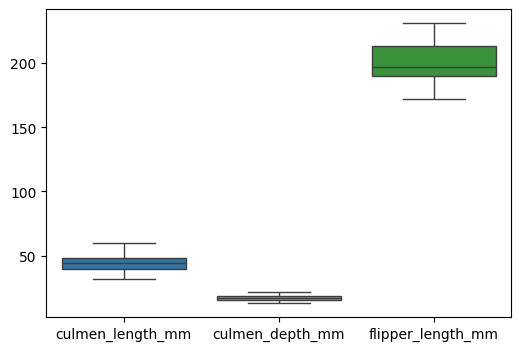

In [15]:
# 3. 이상치 확인
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_pg[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]])
plt.show()

매우 많은 피처가 있을 경우 이들 중 결정값(즉 레이블)과 가장 상관성이 높은 피처들을 위주로 이상치 검출하는 것이 좋다
- df_pg.corr()
- corr() : 수치형 열 간의 관계만 분석

In [ ]:
# 이상치 제거
def remove_iqr(df, columns) :       # columns : list 형태
    df_clean = df.copy()            # df 복사본 만들기

    for col in columns :
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR      # 이상치데이터 하단
        upper = Q3 + 1.5 * IQR      # 이상치데이터 상단
        # 이상치데이터 범위 안에 것들만 추출 (lower 보다 높고 upper보다 작은)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

In [17]:
print("Before : ", df_pg.shape)

Before :  (334, 7)


In [18]:
df_cleaned = remove_iqr(df_pg, ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"])
print("After : ", df_pg.shape)

After :  (334, 7)


In [ ]:
# 4. 범주형 변수 처리
df_pg["island"].unique()

array([2, 0, 1])

In [64]:
features = ["sex", "island"]
for feature in features :
    le = LabelEncoder()
    le_result = le.fit(df_pg[feature])
    df_pg[feature] = le_result.transform(df_pg[feature])

df_pg.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


In [66]:
from sklearn.model_selection import train_test_split

In [ ]:
# 5. 데이터 분할
X_data = df_pg.drop("species", axis=1)
y_data = df_pg["species"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=42)

In [ ]:
# 6. 모델 학습 함수
from sklearn.metrics import classification_report

def train_model(model) :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred, y_test))

In [74]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
train_model(model)

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        27
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       1.00      0.96      0.98        25

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.97        67
weighted avg       0.97      0.97      0.97        67



In [75]:
# 결정 트리
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
train_model(model)

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       1.00      0.88      0.93        16
      Gentoo       0.92      1.00      0.96        22

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.95        67



In [76]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
train_model(model)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

